In [9]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
def projection_zero_min_bounds(vector, volumes, total_volume) :
    u = vector.clip(min=0)
    if(np.sum(u*volumes)<=total_volume):
        return u
    
    sorted_indexes = np.argsort(vector/volumes)
    
    a = volumes[sorted_indexes[-1]]**2
    b = (volumes*vector)[sorted_indexes[-1]]
    for i in range(len(u)-2,-1,-1) :
        if( (b-total_volume)/a > (vector/volumes)[sorted_indexes[i]]) :
            break
        a += volumes[sorted_indexes[i]]**2
        b += (volumes*vector)[sorted_indexes[i]]

    theta = (b-total_volume)/a
    output = (vector-theta*volumes).clip(min=0)

    #print("Theta: {}, Slackness condition: {}, Theta constraint: {}".format(theta, theta*(np.sum(volumes*output)-total_volume), np.sum(volumes*output)-total_volume))
    return output

def projection(vector, volumes, total_volume, min_bounds=0) :
    new_total_volume = total_volume-np.sum(volumes*min_bounds)
    assert new_total_volume>=0, "Bounds do not respect the constraint: np.sum(min_bounds)<=radius"
    return projection_zero_min_bounds(vector-min_bounds, volumes, new_total_volume)+min_bounds

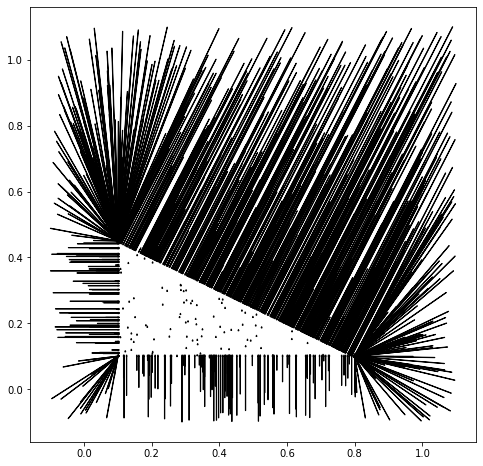

In [26]:
min_bounds = np.array([0.1, 0.1])
plt.figure(figsize=(8,8))
for i in range(1000) :
    point = np.random.uniform(low=-.1,high=1.1,size=2)
    target = projection(point,np.array([1,2]), 1, np.array([0.1,0.1]))
    plt.arrow(point[0], point[1], target[0]-point[0], target[1]-point[1],color="black")
plt.show()

---

In [10]:
def projection_ok(v, radius=1) :
    n, = v.shape
    u = v.clip(min=0)
    if np.sum(u) <= radius :
        return u
    else :
        x = np.sort(v)[::-1]
        cssv = np.cumsum(x)
        rho = np.nonzero(x * np.arange(1, n+1) > (cssv - radius))[0][-1]
        theta = (cssv[rho] - radius) / (rho+1)
        z = (v - theta).clip(min=0)
    return z

In [12]:
def projection_ter(vector, volumes, total_volume) :
    u = vector.clip(min=0)
    if(np.sum(u*volumes)<=total_volume):
        return u
    sorted_indexes = np.argsort(vector/volumes)
    a = volumes[sorted_indexes[-1]]**2
    b = (volumes*vector)[sorted_indexes[-1]]
    for i in range(len(u)-2,-1,-1) :
        if(b-(vector/volumes)[sorted_indexes[i]]*a >= total_volume) :
            theta = (b-total_volume)/a
            return (vector-theta*volumes).clip(min=0)
        a += volumes[sorted_indexes[i]]**2
        b += (volumes*vector)[sorted_indexes[i]]
    theta = (b-total_volume)/a
    output = (vector-theta*volumes).clip(min=0)

    print("Theta: {}, Slackness condition: {}, Theta constraint: {}".format(theta, theta*(np.sum(volumes*output)-total_volume), np.sum(volumes*output)-total_volume))
    return output


In [13]:
def projection_bis(vector, volumes, total_volume) :
    def g(theta) :
        return np.sum(volumes*(vector-theta*volumes).clip(min=0))

    u = vector.clip(min=0)
    if(np.sum(u*volumes)<=total_volume):
        return u
    else :
        sorted_indexes = np.argsort(vector/volumes)
        for i in range(len(u)-2,-1,-1) :
            if(g((vector/volumes)[sorted_indexes[i]])>=total_volume) :
                theta = (np.sum((vector*volumes)[sorted_indexes[i+1:]])-total_volume)/np.sum((volumes*volumes)[sorted_indexes[i+1:]])
                return (vector-theta*volumes).clip(min=0)
        theta = (np.sum((vector*volumes))-total_volume)/np.sum((volumes*volumes))

        output = (vector-theta*volumes).clip(min=0)
        print("Theta: {}, Slackness condition: {}, Theta constraint: {}".format(theta, theta*(np.sum(volumes*output)-total_volume), np.sum(volumes*output)-total_volume))
        return output


In [14]:
def projection_zero(v, radius=1) :
    n, = v.shape
    u = v.clip(min=0)
    if np.sum(u) <= radius :
        return u
    else :
        x = np.sort(v)[::-1]
        cssv = np.cumsum(x)
        rho = np.nonzero(x * np.arange(1, n+1) > (cssv - radius))[0][-1]
        theta = (cssv[rho] - radius) / (rho+1)
        z = (v - theta).clip(min=0)
    return z